In [1]:
!grep layerType benchmark.log > benchmark.csv

In [2]:
import pandas as pd

In [3]:
logdata = pd.read_csv('benchmark.csv', sep='\s+', names=['Name', 'Exec', 'L_', 'OpType', 'R_', 'Real Time', 'C_', 'CPU Time', 'E_', 'ExecType'])

In [4]:
logdata = logdata.drop(columns=['L_', 'R_', 'C_', 'E_'])

In [5]:
logdata

,Name,Exec,OpType,Real Time,CPU Time,ExecType
0,input_1_U8_FP32_conv1/Conv2D,EXECUTED,Reorder,93,93,jit_uni_I8
1,conv1/Conv2D,EXECUTED,Convolution,4436,4436,jit_avx2_FP32
2,activation/Relu,NOT_RUN,ReLU,0,0,undef
3,max_pooling2d/MaxPool,EXECUTED,Pooling,575,575,jit_avx_FP32
4,res2a_branch1/Conv2D,EXECUTED,Convolution,1838,1838,jit_avx2_1x1_FP32
...,...,...,...,...,...,...
511,avg_pool/Mean/Pool_nChw8c_...,EXECUTED,Reorder,18,18,jit_uni_FP32
512,avg_pool/Mean/FinalReshape,EXECUTED,Reshape,10,10,unknown_FP32
513,fc1000/MatMul,EXECUTED,FullyConnected,830,830,gemm_blas_FP32
514,fc1000/Softmax,EXECUTED,SoftMax,28,28,ref_any_FP32


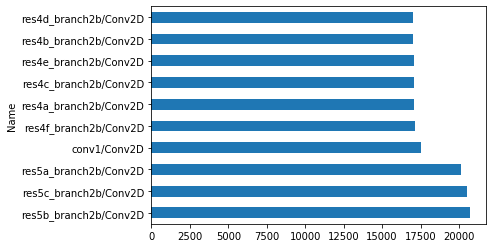

In [6]:
logdata.groupby('Name').sum()['Real Time'].sort_values(ascending=False)[:10].plot.barh()

In [7]:
logdata['ExecType'].value_counts()

undef                260
jit_avx2_1x1_FP32    144
jit_avx2_FP32         68
jit_uni_FP32          12
unknown_FP32          12
jit_avx_FP32           8
jit_uni_I8             4
ref_any_FP32           4
gemm_blas_FP32         4
Name: ExecType, dtype: int64

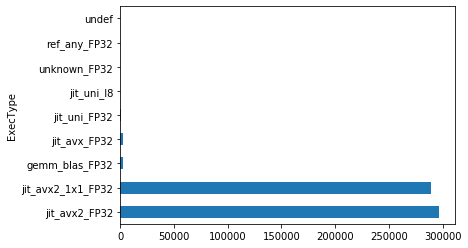

In [8]:
logdata.groupby('ExecType').sum()['Real Time'].sort_values(ascending=False)[:15].plot.barh()

In [9]:
import tfutil

In [10]:
tfutil.print_graph('model.pb')

Loading model: model.pb


/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorflow/

/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site

prefix/input_1 <tensorflow.python.framework.ops.Operation._InputList object at 0x65a437350>  -->  [<tf.Tensor 'prefix/input_1:0' shape=(?, 224, 224, 3) dtype=float32>]
prefix/conv1_pad/Pad/paddings <tensorflow.python.framework.ops.Operation._InputList object at 0x65a437390>  -->  [<tf.Tensor 'prefix/conv1_pad/Pad/paddings:0' shape=(4, 2) dtype=int32>]
prefix/conv1_pad/Pad <tensorflow.python.framework.ops.Operation._InputList object at 0x65a437450>  -->  [<tf.Tensor 'prefix/conv1_pad/Pad:0' shape=(?, 230, 230, 3) dtype=float32>]
prefix/conv1/kernel <tensorflow.python.framework.ops.Operation._InputList object at 0x65a4373d0>  -->  [<tf.Tensor 'prefix/conv1/kernel:0' shape=(7, 7, 3, 64) dtype=float32>]
prefix/conv1/bias <tensorflow.python.framework.ops.Operation._InputList object at 0x65a437410>  -->  [<tf.Tensor 'prefix/conv1/bias:0' shape=(64,) dtype=float32>]
prefix/conv1/Conv2D/ReadVariableOp <tensorflow.python.framework.ops.Operation._InputList object at 0x65a4374d0>  -->  [<tf.Tenso

In [1]:
import tfutil
shp = (1, 224, 224, 3)
tfutil.run_tensorflow_pb('model.pb', 'input_1:0', 'fc1000/Softmax:0', shp)

/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorflow/

Running Tensorflow timeline: model.pb input_1:0 fc1000/Softmax:0 (1, 224, 224, 3) timeline.ctf.json






/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/miniconda3/envs/jupyterlab/lib/python3.7/site

Output: (1, 1000)
Wrote Tensorflow timeline


In [1]:
import tfutil
timeline = tfutil.read_timeline('timeline.ctf.json')

In [2]:
timeline['dur'] = timeline['dur'].astype('float')

In [3]:
print('Execution time:', timeline['dur'].sum())

Execution time: 258829.0


In [4]:
timeline.head(5)

,name,ph,pid,arg_name,cat,tid,ts,dur,arg_op,arg_input0,arg_input1,arg_input2,arg_input3,arg_input4,arg_input5,id
0,process_name,M,0,Allocators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,process_name,M,1,/job:localhost/replica:0/task:0/device:CPU:0 C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,process_name,M,2,/job:localhost/replica:0/task:0/device:CPU:0 T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NoOp,X,1,_SOURCE,Op,0,1585073817030062,45.0,NoOp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Const,X,1,res4e_branch2a/Conv2D/merged_input,Op,0,1585073817030138,32.0,Const,NaN,NaN,NaN,NaN,NaN,NaN,NaN


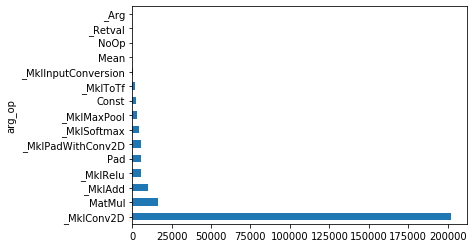

In [5]:
tl=timeline.groupby(by='arg_op')['dur'].sum().sort_values(ascending=False)[:15].plot.barh()